1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

2. Load Dataset

In [2]:
data = pd.read_csv("gender_classification_v7.csv", nrows = 1000)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
995,1,13.6,5.3,0,1,0,1,Male
996,0,12.7,6.0,0,0,0,1,Female
997,1,14.1,5.3,0,0,0,0,Female
998,1,12.1,6.2,1,1,1,0,Male


3. Preprocessing Data & Understanding Data

In [3]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [4]:
data.duplicated().sum()

118

In [5]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [6]:
label_encoder = LabelEncoder()

data["gender"] = label_encoder.fit_transform(data["gender"])
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  882 non-null    int64  
 1   forehead_width_cm          882 non-null    float64
 2   forehead_height_cm         882 non-null    float64
 3   nose_wide                  882 non-null    int64  
 4   nose_long                  882 non-null    int64  
 5   lips_thin                  882 non-null    int64  
 6   distance_nose_to_lip_long  882 non-null    int64  
 7   gender                     882 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.0 KB


In [8]:
print("data shape: ", data.shape)

data shape:  (882, 8)


In [9]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.846939,13.173469,5.972902,0.511338,0.526077,0.511338,0.520408,0.521542
std,0.360251,1.106753,0.531763,0.500155,0.499603,0.500155,0.499867,0.499819
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.gender.value_counts()

gender
1    460
0    422
Name: count, dtype: int64

In [11]:
data.long_hair.value_counts()

long_hair
1    747
0    135
Name: count, dtype: int64

In [12]:
data.lips_thin.value_counts()

lips_thin
1    451
0    431
Name: count, dtype: int64

4. Visualisasi Data

/tmp/ipykernel_5174/4136341205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = "gender", data = data, palette = "rocket")


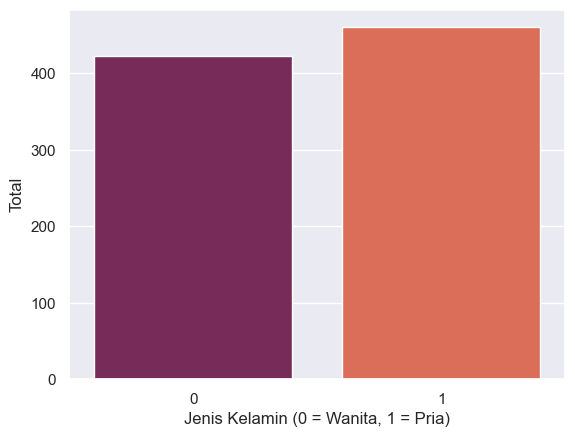

In [13]:
# Visualisasi Data Gender
sb.set_theme(style="darkgrid")
sb.countplot(x = "gender", data = data, palette = "rocket")
plt.ylabel("Total")
plt.xlabel("Jenis Kelamin (0 = Wanita, 1 = Pria)")
plt.show()

/tmp/ipykernel_5174/883722706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = "long_hair", data = data, palette = "rocket")


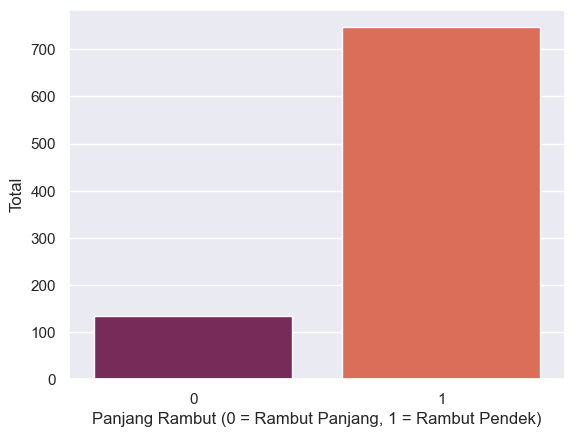

In [14]:
# Visualisasi Data Long_hair
sb.set_theme(style="darkgrid")
sb.countplot(x = "long_hair", data = data, palette = "rocket")
plt.ylabel("Total")
plt.xlabel("Panjang Rambut (0 = Rambut Panjang, 1 = Rambut Pendek)")
plt.show()

/tmp/ipykernel_5174/2376102234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x = "lips_thin", data = data, palette = "rocket")


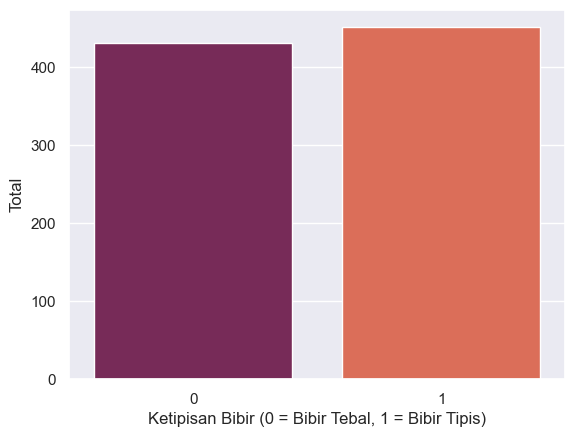

In [15]:
# Visualisasi Data Lips_thin
sb.set_theme(style="darkgrid")
sb.countplot(x = "lips_thin", data = data, palette = "rocket")
plt.ylabel("Total")
plt.xlabel("Ketipisan Bibir (0 = Bibir Tebal, 1 = Bibir Tipis)")
plt.show()

5. Split Dependent (Label/Outcome) & Independent (Atribut) Variable

In [16]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [17]:
x = data.iloc[:, [0,1,2,3,4,5,6]]
y = data.iloc[:, [-1]]

In [18]:
print("x : ", x.shape)
print("y : ", y.shape)

x :  (882, 7)
y :  (882, 1)


6. Splitting Data Test & Data Training 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [20]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)


x_train :  (705, 7)
x_test :  (177, 7)
y_train :  (705, 1)
y_test :  (177, 1)


7. Scalling Data

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
print(x_train)

[[ 0.42300091  1.46730817 -0.29687658 ... -1.02732351  0.9817272
   0.99011973]
 [-2.36406113 -0.71335535  0.4669847  ... -1.02732351  0.9817272
  -1.00997886]
 [ 0.42300091  1.28558621  0.4669847  ...  0.97340321  0.9817272
   0.99011973]
 ...
 [ 0.42300091  0.01353249  1.99470727 ...  0.97340321  0.9817272
   0.99011973]
 [ 0.42300091  0.19525445 -0.48784191 ... -1.02732351 -1.01861291
  -1.00997886]
 [ 0.42300091 -0.34991143  2.18567259 ...  0.97340321  0.9817272
  -1.00997886]]


In [23]:
print(x_test)

[[ 0.42300091  0.19525445  0.84891534 ...  0.97340321  0.9817272
   0.99011973]
 [ 0.42300091  2.01247405  0.84891534 ...  0.97340321  0.9817272
   0.99011973]
 [ 0.42300091 -0.80421633 -1.44266851 ...  0.97340321  0.9817272
  -1.00997886]
 ...
 [ 0.42300091 -0.9859383  -1.25170319 ... -1.02732351 -1.01861291
  -1.00997886]
 [ 0.42300091  1.46730817 -1.25170319 ...  0.97340321  0.9817272
   0.99011973]
 [ 0.42300091  1.55816915 -1.44266851 ...  0.97340321  0.9817272
   0.99011973]]


8. Memanggil Model KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = "minkowski")
knn.fit(x_train, y_train)

/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

9. Evaluasi dan Validasi Model

In [25]:
y_prediction = knn.predict(x_test)
akurasi = accuracy_score(y_test, y_prediction)

print("Jika Nilai K = {}, maka Hasil Akurasinya Adalah: {:.2f}%".format(3, akurasi*100))

Jika Nilai K = 3, maka Hasil Akurasinya Adalah: 95.48%


              precision    recall  f1-score   support

           0       0.94      0.96      0.95        76
           1       0.97      0.95      0.96       101

    accuracy                           0.95       177
   macro avg       0.95      0.96      0.95       177
weighted avg       0.96      0.95      0.95       177



<AxesSubplot: >

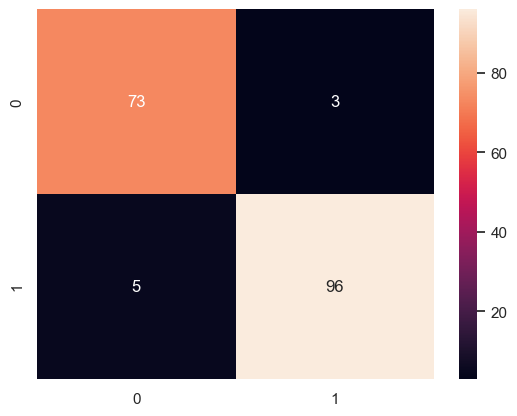

In [26]:
print(classification_report(y_test, y_prediction))
sb.heatmap(confusion_matrix(y_test, y_prediction), annot = True)

10. Mencari Nilai K Terbaik

/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/lib/python3/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

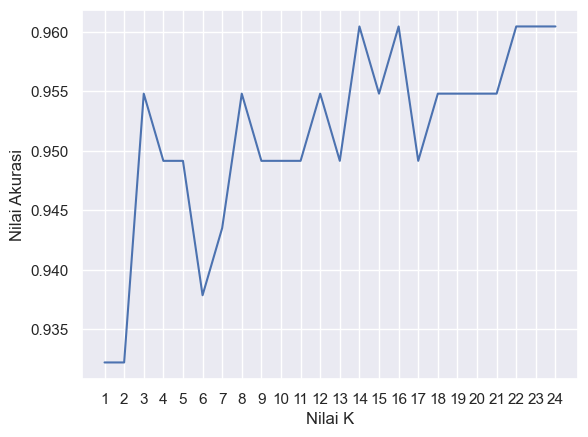

Skor Akurasi Paling Tinggi Adalah 96.05%


In [27]:
kTerbaik = []
for i in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    kTerbaik.append(knn2.score(x_test, y_test))

plt.plot(range(1,25), kTerbaik)
plt.xticks(np.arange(1,25,1))
plt.xlabel("Nilai K")
plt.ylabel("Nilai Akurasi")
plt.show()

maxAccuracy = max(kTerbaik) * 100
print("Skor Akurasi Paling Tinggi Adalah {:.2f}%".format(maxAccuracy))

11. Testing / Simulasi Data Baru

In [28]:
testing = {"long_hair": [1],
           "forehead_width_cm": [11.8],
           "forehead_height_cm": [6.1],
           "nose_wide": [1],
           "nose_long": [0],
           "lips_thin": [1],
           "distance_nose_to_lip_long": [1]
}
testing = pd.DataFrame(testing)
testing

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1


In [ ]:
new_pred = knn.predict(testing)
print("Hasil Prediksi Data Baru Adalah : ", new_pred)